Trying to read from 2022-03 Single User Sale Lease Comps

2022-03 Single User Sale Lease Comps.xlsx has 70 records.


,Parcel Acres,Building SF,Footprint SF,Site Coverage %,Lease Rate PSF,Asking Price/Price Sold,Price PSF,Date Sold/Leased
Type,,,,,,,,
Leased,13.76,33750,27388,0.045693,11.000,0,0.0,2021-04-15 00:00:00
Leased,3.77,22500,16727,0.101857,10.000,0,0.0,2020-03-01 00:00:00
Leased,10.23,28100,25000,0.056102,7.120,0,0.0,2020-06-01 00:00:00
Leased,2.63,10000,10000,0.087288,14.625,0,0.0,2021-04-01 00:00:00
Leased,4.38,30520,30520,0.159964,5.000,0,0.0,2020-11-01 00:00:00


Leased Type has 16 records


,Parcel Acres,Building SF,Footprint SF,Site Coverage %,Lease Rate PSF,Date Leased
Type,,,,,,
Leased,13.76,33750,27388,0.045693,11.000,2021-04-15 00:00:00
Leased,3.77,22500,16727,0.101857,10.000,2020-03-01 00:00:00
Leased,10.23,28100,25000,0.056102,7.120,2020-06-01 00:00:00
Leased,2.63,10000,10000,0.087288,14.625,2021-04-01 00:00:00
Leased,4.38,30520,30520,0.159964,5.000,2020-11-01 00:00:00


The Average Lease Rate is $8.74 PSF

Sold Type has 21 records


,Parcel Acres,Building SF,Footprint SF,Site Coverage %,Price Sold,Price PSF,Date Sold
Type,,,,,,,
Sold,6.37,17825,17825,0.064240,1100000,61.711080,2021-10-15 00:00:00
Sold,10.01,39518,39518,0.090630,5000000,126.524622,2019-12-02 00:00:00
Sold,4.72,34811,29405,0.143021,9300000,267.156933,2021-03-31 00:00:00
Sold,16.63,64606,56000,0.077305,6500000,100.609850,2020-02-03 00:00:00
Sold,1.29,22874,15547,0.276674,2100000,91.807292,2019-03-11 00:00:00


The Average Sold Price is $130.32 PSF

Active Type has 33 records


,Parcel Acres,Building SF,Footprint SF,Site Coverage %,Lease Rate PSF,Asking Price,Price PSF
Type,,,,,,,
Active,4.97,32760,30590,0.141300,12.0,5400000,164.835165
Active,12.00,18238,17050,0.032618,0.0,2490000,136.528128
Active,7.75,44000,38000,0.112563,5.0,4999000,113.613636
Active,17.50,8000,8000,0.010495,0.0,5995000,749.375000
Active,4.00,12318,12318,0.070696,0.0,2795000,226.903718


There is currently 743,419 SF available for sale or lease

Sold Type has 21 records


,Parcel Acres,Building SF,Footprint SF,Site Coverage %,Price Sold,Price PSF,Date Sold
Type,,,,,,,
Sold,6.37,17825,17825,0.064240,1100000,61.711080,2021-10-15 00:00:00
Sold,10.01,39518,39518,0.090630,5000000,126.524622,2019-12-02 00:00:00
Sold,4.72,34811,29405,0.143021,9300000,267.156933,2021-03-31 00:00:00
Sold,16.63,64606,56000,0.077305,6500000,100.609850,2020-02-03 00:00:00
Sold,1.29,22874,15547,0.276674,2100000,91.807292,2019-03-11 00:00:00


None


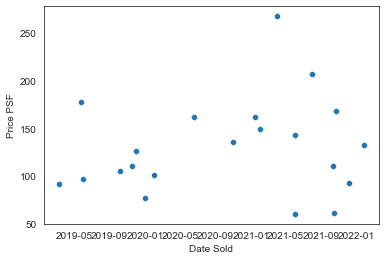

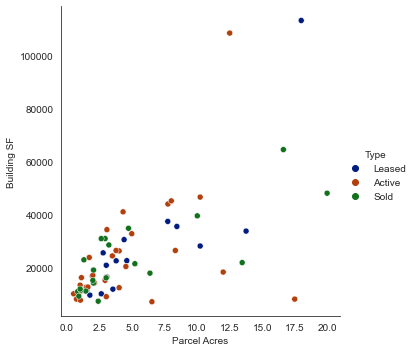

In [48]:
import pandas as pd
import seaborn as sns

# define a class to call object to analyze specific data for stats on single user
# industrial properties in Red Deer, Alberta, Canada 
# that have sold/leased or are currently active for sale/lease


class SingleUserIndustrial():

    def __init__(self, excelsheet: str):
        self._fn = f'{excelsheet}.xlsx'
        print(f'Trying to read from {excelsheet}\n')
        self._df = None

    
    def read_from_xlsx(self):
        self._df =   (pd.read_excel(self._fn, sheet_name='Industrial Building Sales')
                        .drop(['Address', 'Municipality', 'Zoning', 'Lat', 'Long'], axis=1)
                        .set_index("Type"))
              
        
        self._df = self._df.fillna(0).astype({'Footprint SF':'int64', 'Asking Price/Price Sold':'int64'})
        print(f'{self._fn} has {len(self._df)} records.')
        display(self._df.head())
        
    
    def leased(self):
        leased = self._df.loc['Leased'].copy()
        leased.drop(['Asking Price/Price Sold', 'Price PSF'], axis=1, inplace=True)
        leased.rename(columns={"Date Sold/Leased":"Date Leased"}, inplace=True)
        print(f'Leased Type has {len(leased)} records')
        display(leased.head())
        return leased
    
    def sold(self):
        sold = self._df.loc['Sold'].copy()
        sold.drop(['Lease Rate PSF'], axis=1, inplace=True)
        sold.rename(columns={"Asking Price/Price Sold":"Price Sold", "Date Sold/Leased":"Date Sold"}, inplace=True)
        print(f'Sold Type has {len(sold)} records')
        display(sold.head())
        return sold
                
    def active(self):
        active = self._df.loc['Active'].copy()
        active.drop(['Date Sold/Leased'], axis=1, inplace=True)
        active.rename(columns={"Asking Price/Price Sold":"Asking Price"}, inplace=True)
        print(f'Active Type has {len(active)} records')
        display(active.head())
        return active
    
    def leased_avg(self):
        return self.leased()['Lease Rate PSF'].mean()
    
    def sold_avg(self):
        return self.sold()['Price PSF'].mean()
    
    def active_area(self):
        return self.active()['Building SF'].sum()
    
    def sns_leased(self):
        sns_leased = self.leased().set_index('Date Leased')
        sns.set_style("white")
        sns.scatterplot(data=sns_leased, x="Date Leased", y="Lease Rate PSF", palette='dark')
    
    def sns_sold(self):
        sns_sold = self.sold().set_index('Date Sold')
        sns.set_style("white")
        sns.scatterplot(data=sns_sold, x="Date Sold", y="Price PSF", palette='dark')
    
    def sns_total(self):
        sns_total = self._df.reset_index()
        sns.set_style("white")
        sns.relplot(data=sns_total, x="Parcel Acres", y="Building SF", hue="Type", palette='dark')
         



si = SingleUserIndustrial('2022-03 Single User Sale Lease Comps')
si.read_from_xlsx()
print(f'The Average Lease Rate is ${si.leased_avg():,.2f} PSF\n')
print(f'The Average Sold Price is ${si.sold_avg():,.2f} PSF\n')
print(f'There is currently {si.active_area():,.0f} SF available for sale or lease\n')

print(si.sns_sold())
si.sns_total()

